In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=df.iloc[:,1:-1]

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
len(df)

569

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

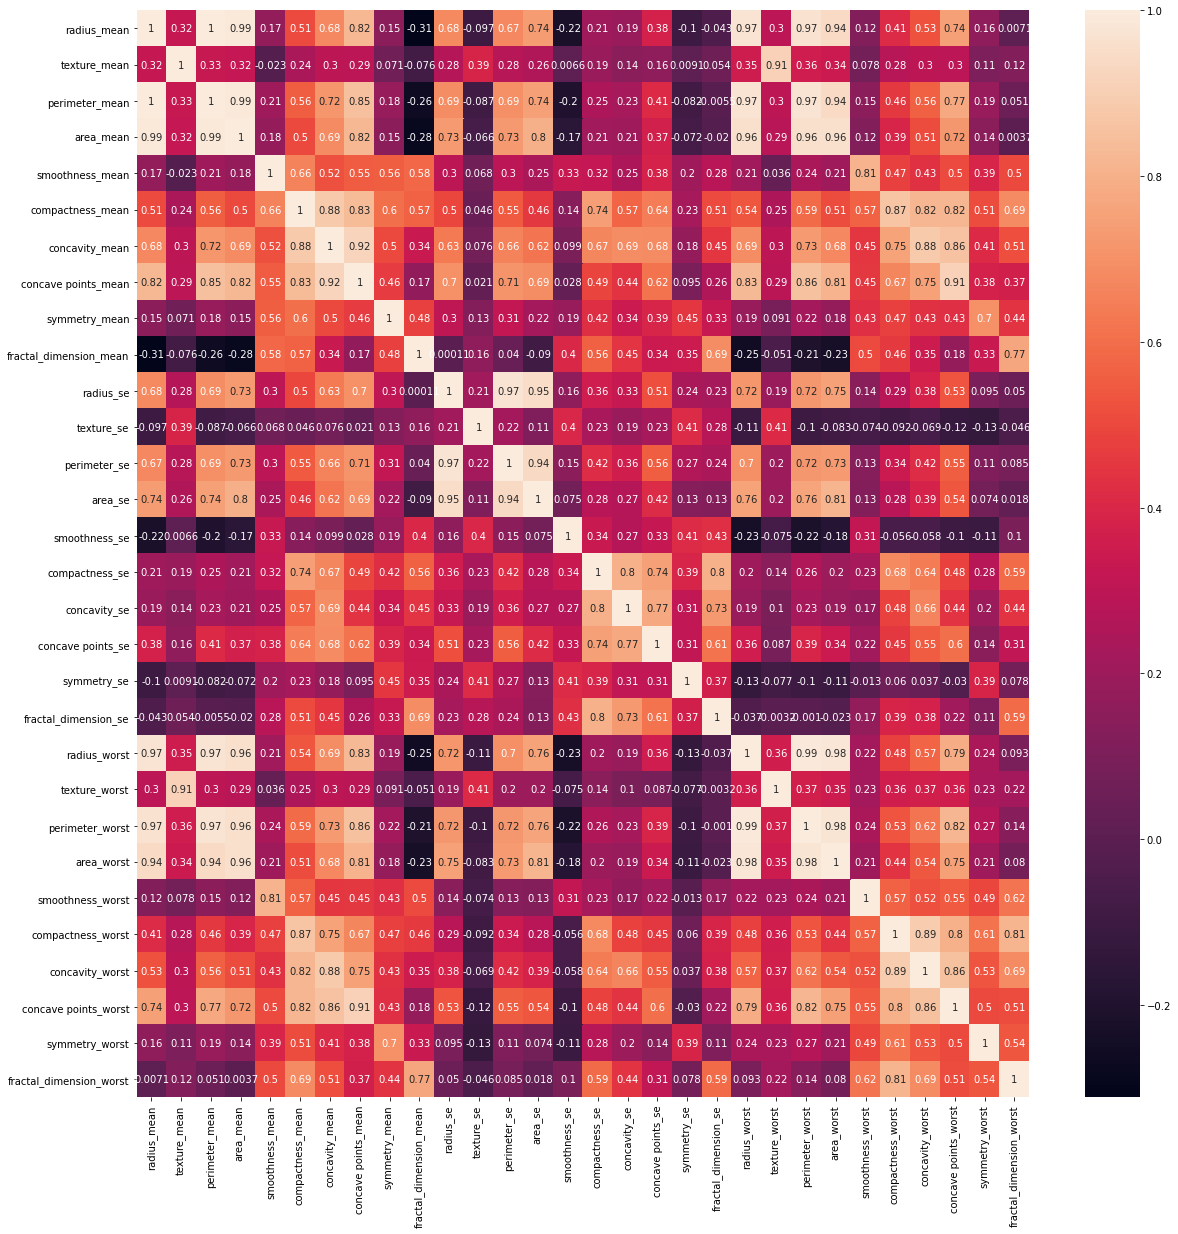

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True)

### Remove Highly Correlated Features (Threshold=0.8)

In [10]:
corr_mat=X.corr()

In [11]:
ar = np.array(corr_mat)

In [12]:
s=set()
for i in range(len(ar)):
    for j in range(i+1,len(ar)):
        if ar[i][j]>=0.8 or ar[i][j]<=-0.8:
            s.add(j)

In [13]:
len(s)

17

In [14]:
s = list(s)

In [15]:
s

[2, 3, 6, 7, 12, 13, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]

In [16]:
drop_ft = []
e = enumerate(corr_mat)
for i in e:
    if i[0] in s:
        drop_ft.append(i[1])

In [17]:
drop_ft

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']

In [18]:
X.drop(drop_ft,axis=1,inplace=True)

In [26]:
X.tail(10)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
559,11.51,23.93,0.09261,0.10210,0.1388,0.06570,0.2388,2.904,0.008200,0.029820,0.01267,0.01488,0.2112
560,14.05,27.15,0.09929,0.11260,0.1537,0.06171,0.3645,1.492,0.007256,0.026780,0.01626,0.02080,0.2250
561,11.20,29.37,0.07449,0.03558,0.1060,0.05502,0.3141,3.896,0.007594,0.008878,0.00000,0.01989,0.1566
562,15.22,30.62,0.10480,0.20870,0.2128,0.07152,0.2602,1.205,0.004625,0.048440,0.01608,0.02137,0.4089
563,20.92,25.09,0.10990,0.22360,0.2149,0.06879,0.9622,1.026,0.006399,0.043100,0.02624,0.02057,0.2929
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.256,0.010300,0.028910,0.02454,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.463,0.005769,0.024230,0.01678,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.075,0.005903,0.037310,0.01557,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.595,0.006522,0.061580,0.01664,0.02324,0.4087
568,7.76,24.54,0.05263,0.04362,0.1587,0.05884,0.3857,1.428,0.007189,0.004660,0.00000,0.02676,0.2871


In [24]:
y.tail(10)

559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

In [25]:
#plt.figure(figsize=(10,10))
#sns.heatmap(X.corr(),annot=True)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [110]:
from sklearn.ensemble import RandomForestClassifier
clas = RandomForestClassifier()
clas.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
y_pred = clas.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9181286549707602
[[104   8]
 [  6  53]]
              precision    recall  f1-score   support

           B       0.95      0.93      0.94       112
           M       0.87      0.90      0.88        59

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



### HyperParameter Optimization

In [116]:
parameters = { 
                'n_estimators': [10,100,1000],
                'criterion': ['gini','entropy'],
                'max_depth': [None,5,10,15]
             }

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
rscv = RandomizedSearchCV(estimator = clas,param_distributions=parameters,n_jobs=-1,n_iter=10,cv=10,scoring='accuracy')

In [119]:
rscv.fit(X,y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'n_estimators': [10, 100, 1000]},
                   scoring='accuracy')

In [120]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [121]:
rscv.best_params_

{'n_estimators': 1000, 'max_depth': None, 'criterion': 'entropy'}

In [123]:
rscv.best_score_

0.943765664160401

In [124]:
from sklearn.ensemble import RandomForestClassifier
clas = RandomForestClassifier(n_estimators=1000,criterion='entropy')
clas.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [125]:
y_pred = clas.predict(X_test)

In [126]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9298245614035088
[[105   7]
 [  5  54]]
              precision    recall  f1-score   support

           B       0.95      0.94      0.95       112
           M       0.89      0.92      0.90        59

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



In [128]:
import pickle

In [129]:
pickle.dump(clas, open('CancerClassifier.pkl','wb'))